In [17]:
import itertools

import pandas as pd
from matplotlib.axes import Axes
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

In [19]:
df_orig = pd.read_csv('../logs/rundirs/sorted-20241116_215630.csv')
df_orig

,Date,Scenario ID,Vehicle ID,Vehicle type,Cycle distance (m),No. of completed missions,Total distance traveled (m),No. of stops,No. of violations,No. of critical sections,No. of near-misses,No. of collisions,Is deadlocked,Total waiting time (s),Maximum waiting time (s),Total time (s),Maximum acceleration (m/s^2),Maximum speed (m/s),Average speed (m/s)
0,20241116_193507,map-generator/generated-maps/2024-11-16_17:00:...,0,HumanDrivenVehicle,77.56,129,9941.9,178,53,1174,19,15,0,333.1,23.1,1799.9,3,10,5.5
1,20241116_194335,map-generator/generated-maps/2024-11-16_17:00:...,0,HumanDrivenVehicle,77.56,8,619.3,11,4,432,1,1,1,1707.6,1693.1,1799.9,3,10,0.3
2,20241116_194642,map-generator/generated-maps/2024-11-16_17:00:...,0,HumanDrivenVehicle,77.56,122,9384.3,193,98,1613,17,25,0,318.1,12.3,1799.9,3,10,5.2
3,20241116_195406,map-generator/generated-maps/2024-11-16_17:00:...,0,HumanDrivenVehicle,77.56,125,9625.1,195,110,1567,37,34,0,317.3,8.2,1799.9,3,10,5.3
4,20241116_200130,map-generator/generated-maps/2024-11-16_17:00:...,0,HumanDrivenVehicle,77.56,155,11882.0,168,22,1278,13,8,0,116.3,1.2,1799.9,3,10,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,20241116_212333,map-generator/generated-maps/2024-11-16_17:00:...,4,AutonomousVehicle,47.90,140,13142.1,145,0,327,6,4,0,99.3,0.7,1799.9,3,10,7.3
96,20241116_213108,map-generator/generated-maps/2024-11-16_17:00:...,4,AutonomousVehicle,60.34,93,11136.7,132,0,582,11,8,1,351.1,20.1,1799.9,3,10,6.2
97,20241116_213838,map-generator/generated-maps/2024-11-16_17:00:...,4,AutonomousVehicle,60.34,2,270.4,8,0,25,1,0,1,1758.3,1731.4,1799.9,3,10,0.2
98,20241116_214138,map-generator/generated-maps/2024-11-16_17:00:...,4,AutonomousVehicle,52.64,54,5683.8,161,0,739,1,3,0,743.9,13.3,1799.9,3,10,3.2


In [20]:
df_id = df_orig['Scenario ID'].str.split(r'[;,] ', expand=True)
df_id.columns = ['filename', 'Coordination strategy', 'string_seed', 'heuristic']
df_id = pd.concat([
    df_id, 
    df_id['filename'].str.extract(r'/scenario(?P<i_map>\d+)-(?P<i_locations>\d+).json$', expand=True).astype(int)
], axis=1).rename(columns={'i_locations': 'Positions variant'})
df_id

,filename,Coordination strategy,string_seed,heuristic,i_map,Positions variant
0,map-generator/generated-maps/2024-11-16_17:00:...,change of priorities,seed 1,AUTOMATED_FIRST,1,1
1,map-generator/generated-maps/2024-11-16_17:00:...,stops,seed 1,AUTOMATED_FIRST,1,1
2,map-generator/generated-maps/2024-11-16_17:00:...,change of priorities,seed 1,AUTOMATED_FIRST,1,2
3,map-generator/generated-maps/2024-11-16_17:00:...,stops,seed 1,AUTOMATED_FIRST,1,2
4,map-generator/generated-maps/2024-11-16_17:00:...,change of priorities,seed 1,AUTOMATED_FIRST,1,3
...,...,...,...,...,...,...
95,map-generator/generated-maps/2024-11-16_17:00:...,stops,seed 1,AUTOMATED_FIRST,1,8
96,map-generator/generated-maps/2024-11-16_17:00:...,change of priorities,seed 1,AUTOMATED_FIRST,1,9
97,map-generator/generated-maps/2024-11-16_17:00:...,stops,seed 1,AUTOMATED_FIRST,1,9
98,map-generator/generated-maps/2024-11-16_17:00:...,change of priorities,seed 1,AUTOMATED_FIRST,1,10


In [21]:
index_id = df_orig.columns.get_loc('Scenario ID')
df = pd.concat([df_id[['Coordination strategy', 'Positions variant']], df_orig.iloc[:, index_id + 1:]], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Coordination strategy         100 non-null    object 
 1   Positions variant             100 non-null    int64  
 2   Vehicle ID                    100 non-null    int64  
 3   Vehicle type                  100 non-null    object 
 4   Cycle distance (m)            100 non-null    float64
 5   No. of completed missions     100 non-null    int64  
 6   Total distance traveled (m)   100 non-null    float64
 7   No. of stops                  100 non-null    int64  
 8   No. of violations             100 non-null    int64  
 9   No. of critical sections      100 non-null    int64  
 10  No. of near-misses            100 non-null    int64  
 11  No. of collisions             100 non-null    int64  
 12  Is deadlocked                 100 non-null    int64  
 13  Total 

In [22]:
series_deadlocks = df.groupby(['Positions variant'])['Is deadlocked'].sum()
indices_locations_deadlocked = series_deadlocks[series_deadlocks != 0].index
indices_locations_nondeadlocked = series_deadlocks[series_deadlocks == 0].index
indices_locations_nondeadlocked

Index([2, 3, 4, 5, 6, 7], dtype='int64', name='Positions variant')

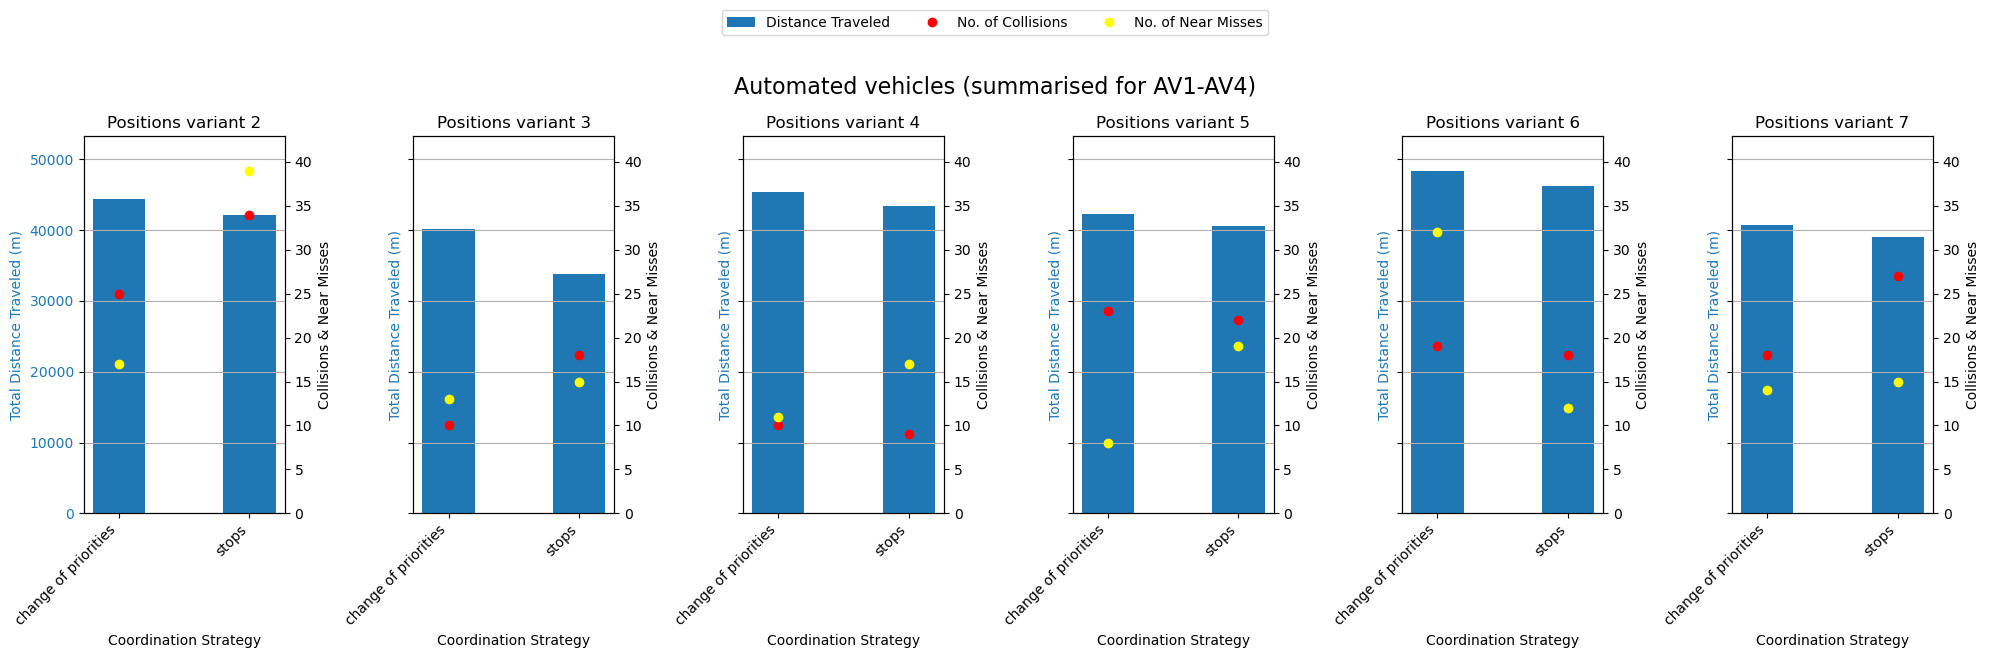

Total distance traveled (m)  \
Positions variant Coordination strategy                                
2                 change of priorities                       44363.8   
                  stops                                      42169.2   
3                 change of priorities                       40221.4   
                  stops                                      33799.3   
4                 change of priorities                       45395.4   
                  stops                                      43462.5   
5                 change of priorities                       42216.9   
                  stops                                      40631.2   
6                 change of priorities                       48397.2   
                  stops                                      46213.0   
7                 change of priorities                       40705.1   
                  stops                                      39064.4   

                                         No. of collisions  No. of near-misses  
Positions variant Coordination strategy                                         
2                 change of priorities                  25                  17  
                  stops                                 34                  39  
3                 change of priorities                  10                  13  
                  stops                                 18                  15  
4                 change of priorities                  10                  11  
                  stops                                  9                  17  
5                 change of priorities                  23                   8  
                  stops                                 22                  19  
6                 change of priorities                  19                  32  
                  stops                                 18                  12  
7                 change of priorities                  18                  14  
                  stops                                 27                  15

In [23]:
def plot_aut(df):
    # Extract levels
    positions = df.index.get_level_values('Positions variant').unique()
    strategies = df.index.get_level_values('Coordination strategy').unique()
    
    # Plot configuration
    fig, axes = plt.subplots(1, len(positions), figsize=(20, 6), sharey=True, squeeze=False)
    axes: list[list[Axes]]
    bar_width = 0.4
    colors = ['tab:blue', 'red', 'yellow']
    
    # Get the global min and max values for consistent y-axis scaling
    y1_min, y1_max = df['Total distance traveled (m)'].min(), df['Total distance traveled (m)'].max()
    y2_min, y2_max = min(df['No. of collisions'].min(), df['No. of near-misses'].min()), max(df['No. of collisions'].max(), df['No. of near-misses'].max())
    
    # Iterate through each Positions variant
    for i, pos in enumerate(positions):
        ax = axes[0][i]
        df_pos = df.loc[pos]
        
        # Bar positions for each Coordination strategy
        x_positions = np.arange(len(strategies))
        
        # Plot bars for 'Total distance traveled (m)'
        bars = ax.bar(x_positions, df_pos['Total distance traveled (m)'], width=bar_width, label='Distance Traveled', color=colors[0])
        ax.set_xlabel('Coordination Strategy')
        ax.set_ylabel('Total Distance Traveled (m)', color=colors[0])
        ax.tick_params(axis='y', labelcolor=colors[0])
        ax.set_ylim(0, y1_max * 1.1)
        
        # Create a secondary axis for the points
        ax_right = ax.twinx()
        
        # Plot points for 'No. of collisions' and 'No. of near-misses'
        collisions, = ax_right.plot(x_positions, df_pos['No. of collisions'], marker='o', linestyle='', label='No. of Collisions', color=colors[1])
        near_misses, = ax_right.plot(x_positions, df_pos['No. of near-misses'], marker='o', linestyle='', label='No. of Near Misses', color=colors[2])
        ax_right.set_ylabel('Collisions & Near Misses', color='black')
        ax_right.tick_params(axis='y', labelcolor='black')
        ax_right.set_ylim(0, y2_max * 1.1)
        
        # Add labels, grid, and title for each section
        ax.set_xticks(x_positions)
        ax.set_xticklabels(strategies, rotation=45, ha='right')
        ax.set_title(f'Positions variant {pos}')
        ax.grid(axis='y')
        
        if i == 0:
            handles = [bars, collisions, near_misses]
            labels = ['Distance Traveled', 'No. of Collisions', 'No. of Near Misses']
        
    fig.suptitle('Automated vehicles (summarised for AV1-AV4)', fontsize=16)
    fig.legend(handles=handles, labels=labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.1))
    plt.tight_layout()
    plt.show()

    
df_aut = df
df_aut = df_aut[df_aut['Positions variant'].isin(indices_locations_nondeadlocked)]
df_aut = df_aut[df_aut['Vehicle type'] == 'AutonomousVehicle']
df_aut = df_aut.groupby(['Positions variant', 'Coordination strategy']).sum()
df_aut = df_aut[['Total distance traveled (m)', 'No. of collisions', 'No. of near-misses']]
plot_aut(df_aut)
df_aut

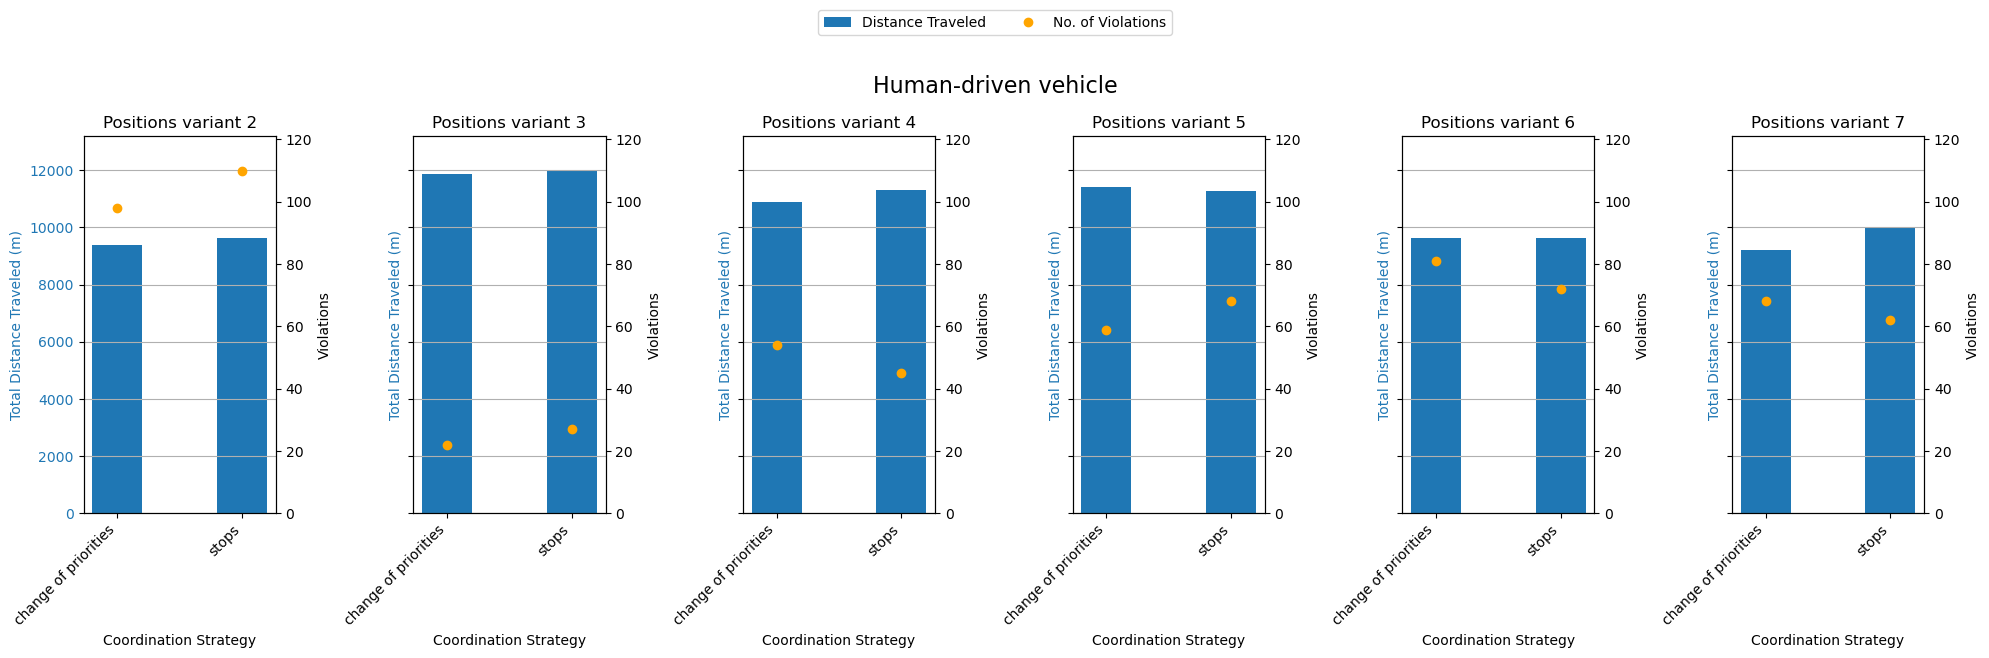

Total distance traveled (m)  \
Positions variant Coordination strategy                                
2                 change of priorities                        9384.3   
                  stops                                       9625.1   
3                 change of priorities                       11882.0   
                  stops                                      11989.1   
4                 change of priorities                       10904.2   
                  stops                                      11321.0   
5                 change of priorities                       11427.1   
                  stops                                      11260.4   
6                 change of priorities                        9643.9   
                  stops                                       9626.7   
7                 change of priorities                        9199.2   
                  stops                                       9970.7   

                                         No. of violations  
Positions variant Coordination strategy                     
2                 change of priorities                  98  
                  stops                                110  
3                 change of priorities                  22  
                  stops                                 27  
4                 change of priorities                  54  
                  stops                                 45  
5                 change of priorities                  59  
                  stops                                 68  
6                 change of priorities                  81  
                  stops                                 72  
7                 change of priorities                  68  
                  stops                                 62

In [26]:
def plot_hum(df):
    # Extract levels
    positions = df.index.get_level_values('Positions variant').unique()
    strategies = df.index.get_level_values('Coordination strategy').unique()
    
    # Plot configuration
    fig, axes = plt.subplots(1, len(positions), figsize=(20, 6), sharey=True, squeeze=False)
    axes: list[list[Axes]]
    bar_width = 0.4
    colors = ['tab:blue', 'orange']
    
    # Get the global min and max values for consistent y-axis scaling
    y1_min, y1_max = df['Total distance traveled (m)'].min(), df['Total distance traveled (m)'].max()
    y2_min, y2_max = df['No. of violations'].min(), df['No. of violations'].max()
    
    # Iterate through each Positions variant
    for i, pos in enumerate(positions):
        ax = axes[0][i]
        df_pos = df.loc[pos]
        
        # Bar positions for each Coordination strategy
        x_positions = np.arange(len(strategies))
        
        # Plot bars for 'Total distance traveled (m)'
        bars = ax.bar(x_positions, df_pos['Total distance traveled (m)'], width=bar_width, label='Distance Traveled', color=colors[0])
        ax.set_xlabel('Coordination Strategy')
        ax.set_ylabel('Total Distance Traveled (m)', color=colors[0])
        ax.tick_params(axis='y', labelcolor=colors[0])
        ax.set_ylim(0, y1_max * 1.1)
        
        # Create a secondary axis for the points
        ax_right = ax.twinx()
        
        # Plot points for 'No. of collisions' and 'No. of near-misses'
        violations, = ax_right.plot(x_positions, df_pos['No. of violations'], marker='o', linestyle='', label='No. of Violations', color=colors[1])
        ax_right.set_ylabel('Violations', color='black')
        ax_right.tick_params(axis='y', labelcolor='black')
        ax_right.set_ylim(0, y2_max * 1.1)
        
        # Add labels, grid, and title for each section
        ax.set_xticks(x_positions)
        ax.set_xticklabels(strategies, rotation=45, ha='right')
        ax.set_title(f'Positions variant {pos}')
        ax.grid(axis='y')
        
        if i == 0:
            handles = [bars, violations]
            labels = ['Distance Traveled', 'No. of Violations']
        
    fig.suptitle('Human-driven vehicle', fontsize=16)
    fig.legend(handles=handles, labels=labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.1))
    plt.tight_layout()
    plt.show()

    
df_hum = df
df_hum = df_hum[df_hum['Positions variant'].isin(indices_locations_nondeadlocked)]
df_hum = df_hum[df_hum['Vehicle type'] == 'HumanDrivenVehicle']
df_hum = df_hum.groupby(['Positions variant', 'Coordination strategy']).sum()
df_hum = df_hum[['Total distance traveled (m)', 'No. of violations']]
plot_hum(df_hum)
df_hum

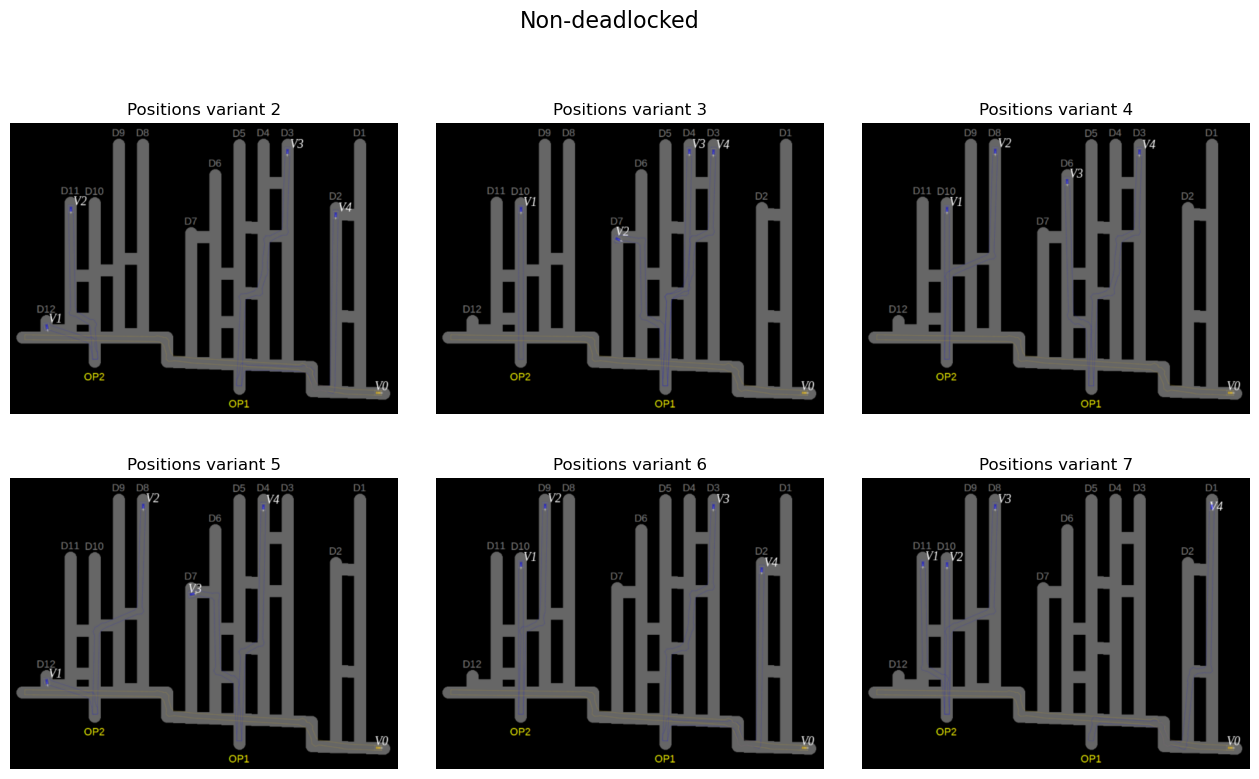

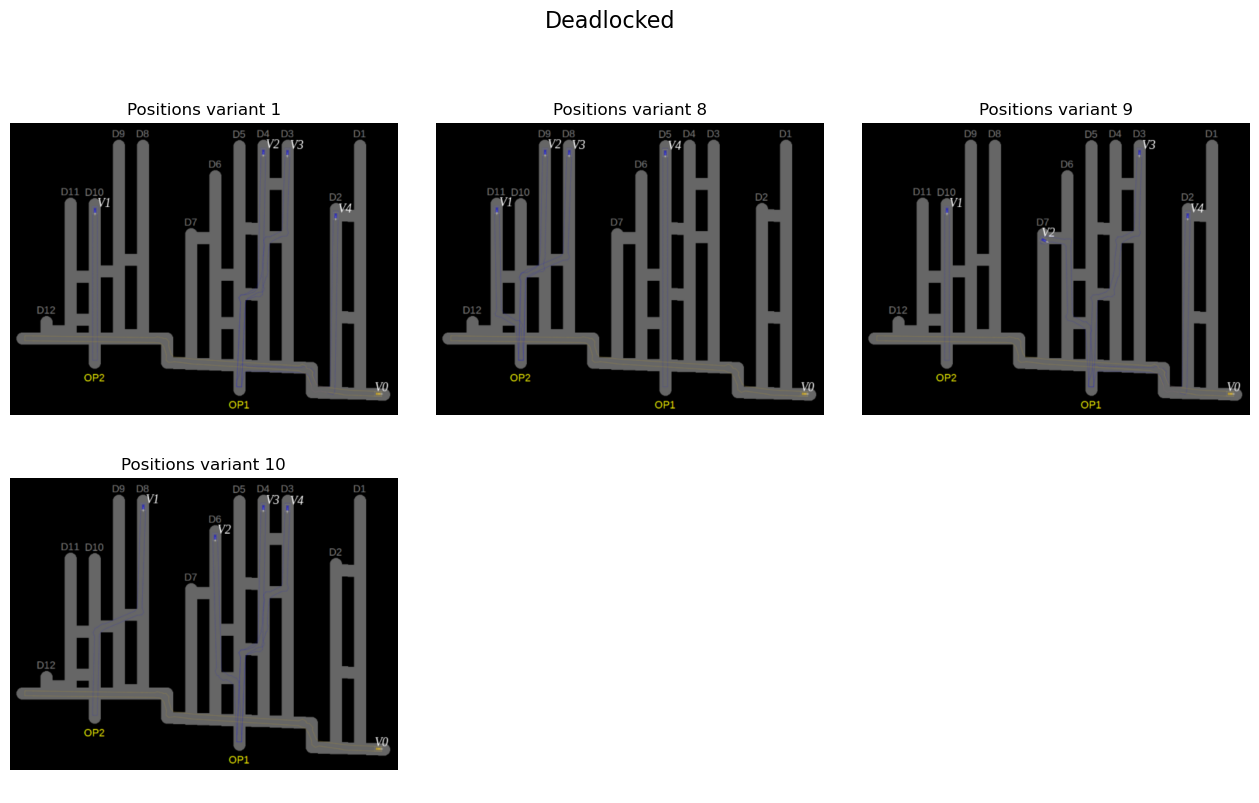

In [11]:
def show_maps(title, indices, nrows, ncols): 
    fig, axes_matrix = plt.subplots(nrows, ncols, figsize=(16, 9), squeeze=False)
    axes_matrix: list[list[Axes]]
    axes = list(itertools.chain.from_iterable(axes_matrix))
    assert len(axes) >= len(indices)
    
    for ax in axes:
        ax.axis('off')
        
    for ax, i_pos in zip(axes, indices):
        image = plt.imread(f'../screenshotting/screenshots/cropped/{i_pos}.png')
        ax.imshow(image)
        ax.title.set_text(f'Positions variant {i_pos}')
    
    fig.suptitle(title, fontsize=16)

    plt.subplots_adjust(wspace=0.1, hspace=0.05)
    plt.show()
    
show_maps('Non-deadlocked', indices_locations_nondeadlocked, 2, 3)
show_maps('Deadlocked', indices_locations_deadlocked, 2, 3)